## Requests 사용법

In [3]:
# 서버에 페이지 정보 요청할 때 라이브러리
import requests as req

In [4]:
url = 'https://www.naver.com/'
res = req.get(url) # <Response[200]> 응답이 성공 ## res 변수 사용

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
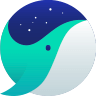
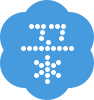

In [5]:
# 요청한 페이지 보기
res.text

## BeautifulSoup 사용하기
-- 내가 원하는 내용만 추출하기 위해 파싱해주는 라이브러리

- 파싱 : 어떤 페이지(html, 문서 등)에서 내가 원하는 데이터를 특정 패턴이나 순서로 추출하여 가공하는 것

In [6]:
from bs4 import BeautifulSoup as bs

In [7]:
# bs(가공할 데이터, 가공방식-파싱방법)
soup = bs(res.text, 'lxml') ## req.get() 형식에서 기존의 html형식으로 변경됨 ## 가독성 향상

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
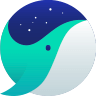
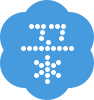

In [8]:
soup

In [9]:
# 내가 원하는 태그를 가져올때 사용하는 함수
result = soup.select('a.nav') ## a태그에서 name이 nav 호출

In [10]:
result[2].text ## 데이터 타입 == 리스트 ##_!! 데이터 타입 확인 ## 글자만 호출하기 위해 .text 사용

'블로그'

[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>,
 <a href="#themecast"><span>주제별캐스트 바로가기</span></a>,
 <a href="#timesquare"><span>타임스퀘어 바로가기</span></a>,
 <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a>,
 <a href="#account"><span>로그인 바로가기</span></a>,
 <a class="_3h-N8T9V" data-clk="dropbanner1a" href="https://whale.naver.com/banner/details/darkmode?=main&amp;wpid=RydDy7"></a>,
 <a class="_2aeXMlrb" data-clk="dropdownload1a" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #7c56d5">다운로드</span></a>,
 <a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>,
 <a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>,
 <a class="link_jrnaver" data-clk="top.jrnaver" href="https://jr.naver.com"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버</span></a>,
 <a class="link_happybin" data-cl
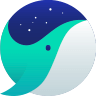
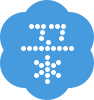

In [11]:
soup.select('a') ## 모든 a태그 호출 ## 데이터 타입 == 리스트

In [12]:
soup.select_one('a') ## a태그 중 하나만 호출 ## 데이터 타입 == 태그 != 리스트

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>

In [13]:
result = soup.select('a.nav')

In [14]:
# 실습1
n_url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EA%B4%91%EC%A3%BC%EB%82%A0%EC%94%A8&oquery=%EA%B4%91%EC%A3%BC%EB%82%A0%EC%94%A8&tqi=hjkLGwp0Yihssn0YDlossssssVl-254273'
res1 = req.get(n_url)
soup1 = bs(res1.text, 'lxml')
result1 = soup1.select('div.temperature_text > strong')
result1[0].text

'현재 온도5°'

## 멜론페이지

In [15]:
url = 'https://www.melon.com/'
res = req.get(url)
res # 결과 : <Response [406]> 응답거부

<Response [406]>

In [16]:
h = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36'} ## 문자로 넣어주기 위해 '' 사용 ## 딕셔너리이므로 {}로 감쌈

In [17]:
url = 'https://www.melon.com/'
res = req.get(url, headers = h)
res

<Response [200]>

In [18]:
# 실습2 - 방법1
soup = bs(res.text, 'lxml')
result = soup.select('span.menu_bg')
result[-2].text

'어학'

In [19]:
# 실습2 - 방법2
soup = bs(res.text, 'lxml')
result = soup.select('span.menu10')
result[0].text

'어학'

In [20]:
# 실습2 - 방법3
soup = bs(res.text, 'lxml')
result = soup.select('span.menu10')
result[0].text

# 해설
## 해당 사이트에서는 span에 이중 클래스를 사용해서 class명 모두를 입력하지 않고, class명 하나만 입력해도 정상적으로 후출됨

'어학'

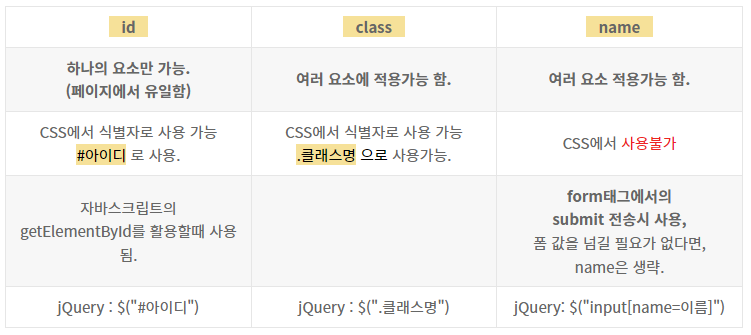

In [21]:
# 메뉴 모두 불러오기
soup = bs(res.text, 'lxml')
result = soup.select('span.menu_bg')
result
## span.menu_bg의 모든 값 불러올때 for 사용
for i in result:
    print(i.text)

멜론차트
최신 음악
장르 음악
멜론DJ
멜론TV
스타포스트
매거진
뮤직어워드
어학
마이뮤직


## 네이버 영화 제목

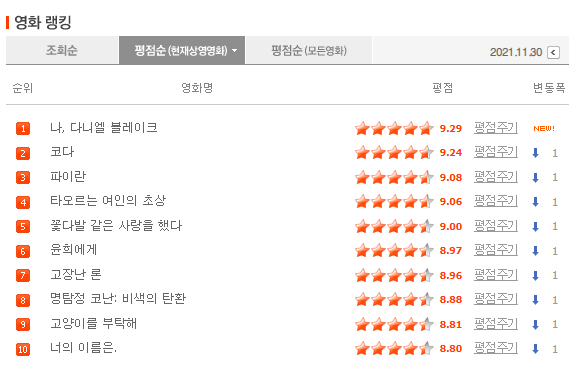

In [22]:
# 실습_1
# 영화 랭킹 > 평점순(현재상영영화) > 영화명 모두 호출하기

In [23]:
# 실습_1 ## ME
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20211130'
res = req.get(url)
res
soup = bs(res.text, 'lxml') # bs(가공할 데이터, 가공방식-파싱방법) ## req.get() 형식에서 기존의 html형식으로 변경됨 ## 가독성 향상
result = soup.select('div.tit5') 
result
for i in result:
    print(i.text) ## 글자만 호출하기 위해 .text 사용


나, 다니엘 블레이크


코다


파이란


타오르는 여인의 초상


꽃다발 같은 사랑을 했다


윤희에게


고장난 론


명탐정 코난: 비색의 탄환


고양이를 부탁해


너의 이름은.


가장 따뜻한 색, 블루


너와 파도를 탈 수 있다면


호빗 : 스마우그의 폐허


엔칸토: 마법의 세계


보이스


너의 췌장을 먹고 싶어


연애 빠진 로맨스


초속5센티미터


다가오는 것들


너의 췌장을 먹고 싶어


프렌치 디스패치


날씨의 아이


듄


유체이탈자


디어 에반 핸슨


아네트


퍼스널 쇼퍼


애비규환


장르만 로맨스


강릉


베놈 2: 렛 데어 비 카니지


이터널스



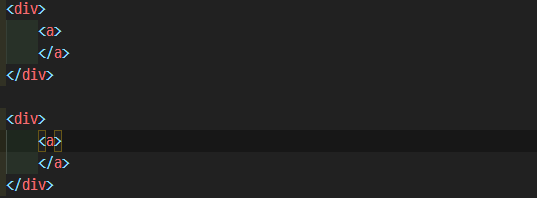

In [24]:
## div와 div 사이에 enter가 ('div.tit5')를 호출하면 같이 호출되기때문에 ('div.tit5 > a로 호출하는게 나음')

In [25]:
# 실습_1 ## CLASS
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20211130'
res = req.get(url)
res
soup = bs(res.text, 'lxml') # bs(가공할 데이터, 가공방식-파싱방법) ## req.get() 형식에서 기존의 html형식으로 변경됨 ## 가독성 향상
result = soup.select('div.tit5 > a') 
result
for i in result:
    print(i.text) ## 글자만 호출하기 위해 .text 사용

나, 다니엘 블레이크
코다
파이란
타오르는 여인의 초상
꽃다발 같은 사랑을 했다
윤희에게
고장난 론
명탐정 코난: 비색의 탄환
고양이를 부탁해
너의 이름은.
가장 따뜻한 색, 블루
너와 파도를 탈 수 있다면
호빗 : 스마우그의 폐허
엔칸토: 마법의 세계
보이스
너의 췌장을 먹고 싶어
연애 빠진 로맨스
초속5센티미터
다가오는 것들
너의 췌장을 먹고 싶어
프렌치 디스패치
날씨의 아이
듄
유체이탈자
디어 에반 핸슨
아네트
퍼스널 쇼퍼
애비규환
장르만 로맨스
강릉
베놈 2: 렛 데어 비 카니지
이터널스


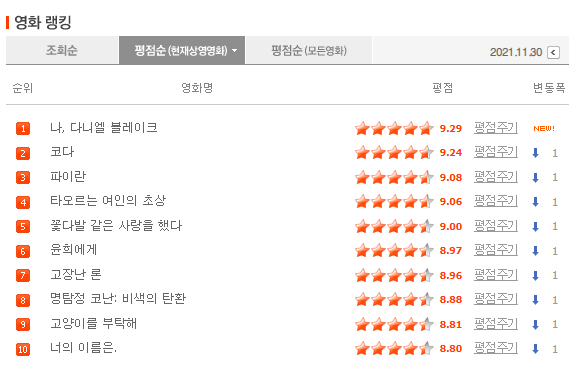

In [26]:
# 실습_2
## 영화 랭킹 > 평점순(현재상영영화) > 평점

In [27]:
# 실습 2 ## ME
point = soup.select('td.point') 
point
for i in point:
    print(i.text)

9.29
9.24
9.08
9.06
9.01
8.97
8.96
8.89
8.81
8.80
8.77
8.52
8.49
8.44
8.44
8.41
8.38
8.35
8.34
8.10
7.97
7.96
7.95
7.89
7.50
7.27
6.96
6.90
6.66
6.38
6.11
5.57


In [28]:
import pandas as pd

In [29]:
len(result)

32

In [30]:
len(point)

32

In [31]:
title_list = []
point_list = []
cnt_list = []

for i in range(len(result)): ## len(result) == 32
    title_list.append(result[i].text)
    point_list.append(point[i].text)
    cnt_list.append(i+1) ## 0부터 시작하므로 +1

In [32]:
dic = {'영화명' : title_list, '평점' : point_list, '순위' : cnt_list}

In [33]:
df = pd.DataFrame(dic)

In [34]:
df.set_index('순위', inplace = True) ## 순위를 인덱스로 수정

In [35]:
df

,영화명,평점
순위,,
1,"나, 다니엘 블레이크",9.29
2,코다,9.24
3,파이란,9.08
4,타오르는 여인의 초상,9.06
5,꽃다발 같은 사랑을 했다,9.01
6,윤희에게,8.97
7,고장난 론,8.96
8,명탐정 코난: 비색의 탄환,8.89
9,고양이를 부탁해,8.81


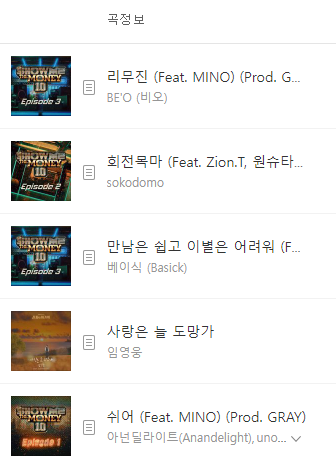

In [36]:
# 곡 제목 + 가수 1명 DataFrame으로 출력

In [37]:
h_chart = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36'}
url_chart = 'https://www.melon.com/chart/index.htm'
res_chart = req.get(url_chart, headers = h_chart)
res_chart

<Response [200]>

In [38]:
soup_chart = bs(res_chart.text, 'lxml')
result_title = soup_chart.select('div.ellipsis.rank01 > span > a')
for i in result_title:
    print(i.text)

리무진 (Feat. MINO) (Prod. GRAY)
회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)
만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL)
사랑은 늘 도망가
불협화음 (Feat. AKMU) (Prod. GRAY)
쉬어 (Feat. MINO) (Prod. GRAY)
MBTI (Feat. 쿠기 & 로꼬) (Prod. GRAY)
Wake Up (Prod. 코드 쿤스트)
strawberry moon
Savage
다정히 내 이름을 부르면
이제 나만 믿어요
신호등
STAY
호우주의 (Feat. 개코, 넉살 (Nucksal)) (Prod. 코드 쿤스트)
그대라는 사치
별빛 같은 나의 사랑아
다시 사랑한다면 (김필 Ver.)
깐부 (Feat. 염따, ASH ISLAND) (Prod. TOIL)
Next Level
My Universe
잊었니
너를 생각해
HERO
끝사랑
OHAYO MY NIGHT
Permission to Dance
Bk Love
Butter
문득
낙하 (with 아이유)
08베이식 (Feat. 염따, punchnello)
바라만 본다
Dynamite
너와 나의 Memories
All I Want for Christmas Is You
Santa Tell Me
계단말고 엘리베이터
Reset (Feat. 개코, Kid Milli) (Prod. 코드 쿤스트)
바래 (Feat. 정인) (Prod. TOIL)
Peaches (Feat. Daniel Caesar & Giveon)
Weekend
헤픈 우연
Bad Habits
TROUBLE (Prod. Slom)
고백
BE ! (Feat. 팔로알토, lIlBOI) (Prod. PEEJAY & Slom)
찰나가 영원이 될 때 (The Eternal Moment)
라일락
Celebrity
그게 더 편할 것 같아 (N번째 연애 X 멜로망스)
밤하늘의 별을(2020)
시간을 거슬러 (낮에 뜨는 달 X 케이윌)
SCIENTIST
좋아좋아
FACE TIME (Feat

In [39]:
soup_chart = bs(res_chart.text, 'lxml')
result_singer = soup_chart.select('div.ellipsis.rank02 > a:first-child') ## a태그를 호출하여 첫 항목만 가져오기

for i in result_singer:
    print(i.text)

BE'O (비오)
sokodomo
베이식 (Basick)
임영웅
Mudd the student
아넌딜라이트(Anandelight)
BE'O (비오)
개코
아이유
aespa
경서예지
임영웅
이무진
The Kid LAROI
조광일
임영웅
임영웅
임영웅
쿤타
aespa
Coldplay
임영웅
주시크 (Joosiq)
임영웅
임영웅
디핵 (D-Hack)
방탄소년단
임영웅
방탄소년단
BE'O (비오)
AKMU (악뮤)
베이식 (Basick)
MSG워너비(M.O.M)
방탄소년단
염따
Mariah Carey
Ariana Grande
임영웅
SINCE
쿤타
Justin Bieber
태연 (TAEYEON)
헤이즈 (Heize)
Ed Sheeran
Don Mills
멜로망스
sokodomo
마크툽 (MAKTUB)
아이유
아이유
멜로망스
경서
케이윌
TWICE (트와이스)
조정석
SINCE
AKMU (악뮤)
Sia
유희열
호미들
브레이브걸스
케이시 (Kassy)
방탄소년단
헤이즈 (Heize)
폴킴
전소미
아이유
조광일
정동하
방탄소년단
송이한
Jawsh 685
Red Velvet (레드벨벳)
오마이걸 (OH MY GIRL)
이무진
Mudd the student
Justin Bieber
임재현
방탄소년단
아이유
세븐틴
마크툽 (MAKTUB)
볼빨간사춘기
이예준
David Guetta
산들
김대명
빅마마
10CM
STAYC(스테이씨)
아이유
ASH ISLAND
BLACKPINK
장범준
전소미
창모 (CHANGMO)
스탠딩 에그
아이유
이무진
장범준


In [40]:
type(result_singer)

bs4.element.ResultSet

In [41]:
title_list = []
singer_list = []
cnt_list = []

for i in range(len(result_title)): ## len(result) == 32
    title_list.append(result_title[i].text)
    singer_list.append(result_singer[i].text)
    cnt_list.append(i+1)

In [42]:
dic_chart1 = {'곡 제목' : title_list, '가수' : singer_list, '순위' : cnt_list}
df_chart1 = pd.DataFrame(dic_chart1)
df_chart1.set_index('순위', inplace = True)
pd.set_option('display.max_rows', None) ## 리스트 전체 출력
df_chart1

,곡 제목,가수
순위,,
1,리무진 (Feat. MINO) (Prod. GRAY),BE'O (비오)
2,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo
3,만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL),베이식 (Basick)
4,사랑은 늘 도망가,임영웅
5,불협화음 (Feat. AKMU) (Prod. GRAY),Mudd the student
6,쉬어 (Feat. MINO) (Prod. GRAY),아넌딜라이트(Anandelight)
7,MBTI (Feat. 쿠기 & 로꼬) (Prod. GRAY),BE'O (비오)
8,Wake Up (Prod. 코드 쿤스트),개코
9,strawberry moon,아이유


### 해설_CLASS

In [43]:
## 해설_STEP1
soup_chart = bs(res_chart.text, 'lxml')
result_singer = soup_chart.select('div.ellipsis.rank02 > a:nth-child(1)') ## a태그를 호출하여 첫 항목만 가져오기

for i in result_singer:
    print(i.text)

BE'O (비오)
sokodomo
베이식 (Basick)
임영웅
Mudd the student
아넌딜라이트(Anandelight)
BE'O (비오)
개코
아이유
aespa
경서예지
임영웅
이무진
The Kid LAROI
조광일
임영웅
임영웅
임영웅
쿤타
aespa
Coldplay
임영웅
주시크 (Joosiq)
임영웅
임영웅
디핵 (D-Hack)
방탄소년단
임영웅
방탄소년단
BE'O (비오)
AKMU (악뮤)
베이식 (Basick)
MSG워너비(M.O.M)
방탄소년단
염따
Mariah Carey
Ariana Grande
임영웅
SINCE
쿤타
Justin Bieber
태연 (TAEYEON)
헤이즈 (Heize)
Ed Sheeran
Don Mills
멜로망스
sokodomo
마크툽 (MAKTUB)
아이유
아이유
멜로망스
경서
케이윌
TWICE (트와이스)
조정석
SINCE
AKMU (악뮤)
Sia
유희열
호미들
브레이브걸스
케이시 (Kassy)
방탄소년단
헤이즈 (Heize)
폴킴
전소미
아이유
조광일
정동하
방탄소년단
송이한
Jawsh 685
Red Velvet (레드벨벳)
오마이걸 (OH MY GIRL)
이무진
Mudd the student
Justin Bieber
임재현
방탄소년단
아이유
세븐틴
마크툽 (MAKTUB)
볼빨간사춘기
이예준
David Guetta
산들
김대명
빅마마
10CM
STAYC(스테이씨)
아이유
ASH ISLAND
BLACKPINK
장범준
전소미
창모 (CHANGMO)
스탠딩 에그
아이유
이무진
장범준


In [44]:
## 해설_STEP2
title_list = []
singer_list = []
cnt_list = []

for i in range(len(result_title)): ## len(result) == 32
    title_list.append(result_title[i].text)
    singer_list.append(result_singer[i].text)
    cnt_list.append(i+1)

In [45]:
## 해설_STEP3
dic_chart1 = {'노래제목' : title_list, '가수' : singer_list, '순위' : cnt_list}
df_chart1 = pd.DataFrame(dic_chart1)
df_chart1.set_index('순위', inplace = True)
pd.set_option('display.max_rows', None) # None : 최대
df_chart1

,노래제목,가수
순위,,
1,리무진 (Feat. MINO) (Prod. GRAY),BE'O (비오)
2,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo
3,만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL),베이식 (Basick)
4,사랑은 늘 도망가,임영웅
5,불협화음 (Feat. AKMU) (Prod. GRAY),Mudd the student
6,쉬어 (Feat. MINO) (Prod. GRAY),아넌딜라이트(Anandelight)
7,MBTI (Feat. 쿠기 & 로꼬) (Prod. GRAY),BE'O (비오)
8,Wake Up (Prod. 코드 쿤스트),개코
9,strawberry moon,아이유


In [59]:
len(singer_list)

100